# Comparison of CEMS and NASA-derived fire weather data

It is preferable to use the `.py` files as the csv files are large and can cause crashes when using the Jupyter Notebook.

However, on a local scale or for more detailed analysis, the comparison can be done here.

## Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import cartopy.crs as ccrs

f = plt.figure(figsize=[4,6])

## All comparisons

It is advised to only have 2 of the 3 csv files open at one time to avoid crashes

In [2]:
cems_csv = pd.read_table('/home/users/clelland/Model/NASA_CEMS_comparison/cems_0114.csv', sep=",", index_col=['year', 'month'])
cems_csv = cems_csv.rename(columns={'build_up_index': 'BUI', 'drought_code': 'DC', 'duff_moisture_code': 'DMC', 'fine_fuel_moisture_code': 'FFMC', 'fire_weather_index': 'FWI', 'initial_fire_spread_index': 'ISI'})
cems_csv_reset = cems_csv.reset_index()

In [2]:
access_csv = pd.read_table('/home/users/clelland/Model/NASA_CEMS_comparison/access_0114.csv', sep=",", index_col=['year', 'month'])
access_csv_reset = access_csv.reset_index()

In [3]:
mri_csv = pd.read_table('/home/users/clelland/Model/NASA_CEMS_comparison/mri_0114.csv', sep=",", index_col=['year', 'month'])
mri_csv_reset = mri_csv.reset_index()

In [9]:
# Merge the dataframes on 'latitude' and 'longitude' columns, keeping only rows with matching lat/lon for the specified year
#df_merged = cems_csv_reset.merge(access_csv_reset, on=['latitude', 'longitude', 'year', 'month'], how='inner')
df_merged = access_csv_reset.merge(mri_csv_reset, on=['latitude', 'longitude', 'year', 'month'], how='inner')

df_merged.set_index(['year', 'month', 'latitude', 'longitude'], inplace=True)
df_merged = df_merged.round(3) # Round to 3dp
df_merged

DC_x  latitude  longitude     DC_y
year month                                       
2001 1       24.960    60.375   -172.875   86.872
     1       33.687    60.375   -172.625   85.160
     1       27.462    60.375   -172.375   65.641
     1        2.515    60.625   -173.125   87.606
     1        7.977    60.625   -172.875   90.397
...             ...       ...        ...      ...
2014 12     605.005    71.375    179.125  845.721
     12     577.385    71.375    179.375  775.988
     12     556.954    71.375    179.625  745.971
     12     618.457    71.375    179.875  805.000
     12     353.583    71.625    179.875  486.664

[13610520 rows x 4 columns]

In [ ]:
bui_corr = df_merged['BUI_x'].corr(df_merged['BUI_y'])
dc_corr = df_merged['DC_x'].corr(df_merged['DC_y'])
dmc_corr = df_merged['DMC_x'].corr(df_merged['DMC_y'])
ffmc_corr = df_merged['FFMC_x'].corr(df_merged['FFMC_y'])
fwi_corr = df_merged['FWI_x'].corr(df_merged['FWI_y'])
isi_corr = df_merged['ISI_x'].corr(df_merged['ISI_y'])
print(f'BUI: {bui_corr}')
print(f'DC: {dc_corr}')
print(f'DMC: {dmc_corr}')
print(f'FFMC: {ffmc_corr}')
print(f'FWI: {fwi_corr}')
print(f'ISI: {isi_corr}')

In [ ]:
print(df_merged['BUI_x'].min())
print(df_merged['BUI_y'].min())
print('-------')
print(df_merged['DC_x'].min())
print(df_merged['DC_y'].min())
print('-------')
print(df_merged['DMC_x'].min())
print(df_merged['DMC_y'].min())
print('-------')
print(df_merged['FFMC_x'].min())
print(df_merged['FFMC_y'].min())
print('-------')
print(df_merged['FWI_x'].min())
print(df_merged['FWI_y'].min())
print('-------')
print(df_merged['ISI_x'].min())
print(df_merged['ISI_y'].min())

In [ ]:
# Expect min = 0
print(df_merged['BUI_x'].max())
print(df_merged['BUI_y'].max())
print('-------')
print(df_merged['DC_x'].max())
print(df_merged['DC_y'].max())
print('-------')
print(df_merged['DMC_x'].max())
print(df_merged['DMC_y'].max())
print('-------')
# FFMC min is 2
print(df_merged['FFMC_x'].max())
print(df_merged['FFMC_y'].max())
print('-------')
print(df_merged['FWI_x'].max())
print(df_merged['FWI_y'].max())
print('-------')
print(df_merged['ISI_x'].max())
print(df_merged['ISI_y'].max())

In [27]:
# Filter the dataframe for more detailed analysis
# Here we find erroneous DC values in the NASA-derived data
df_fil = df_merged[(df_merged['DC_x'] > 2000) & (df_merged['DC_y'] > 2000)]
df_fil

DC_x  latitude  longitude      DC_y
year month                                          
2001 1       2034.523    80.625    -89.875  2236.839
     1       2073.719    80.625    -89.625  2242.173
     1       2091.719    82.125    -50.375  2039.437
     1       2122.672    82.125    -50.125  2827.550
     1       2126.207    82.125    -49.875  2810.914
...               ...       ...        ...       ...
2014 12     10057.675    83.625    -36.875  6711.379
     12      3522.367    83.625    -36.625  4117.359
     12      3448.256    83.625    -36.375  2197.281
     12      2895.135    83.625    -36.125  2141.633
     12      2513.680    83.625    -35.875  2104.015

[13299 rows x 4 columns]

In [34]:
print("Mean DC: ", df_fil['DC_x'].mean())
print("Mean lat: ", df_fil['latitude'].mean())
print("Min lat: ", df_fil['latitude'].min())

Mean DC:  6465.268337995339
Mean lat:  83.1121230919618
Min lat:  75.125


### Show lats and lons on a map

In [33]:
# Find unique combinations of (latitude, longitude)
unique_combinations = mri_csv[['latitude', 'longitude']].drop_duplicates()

# Count the number of unique combinations
num_unique_combinations = unique_combinations.shape[0]

print(f"Number of unique (latitude, longitude) combinations: {num_unique_combinations}")

Number of unique (latitude, longitude) combinations: 81015


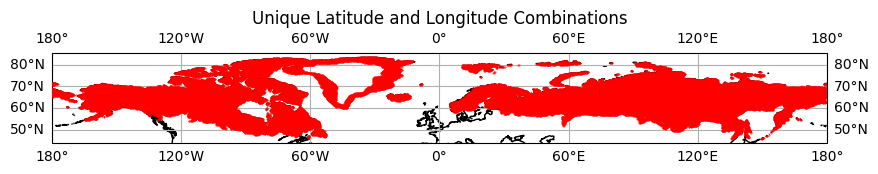

In [34]:
# Find unique combinations of (latitude, longitude)
unique_combinations = mri_csv.loc[2007, 1][['latitude', 'longitude']]

# Set up the map
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_title('Unique Latitude and Longitude Combinations')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Plot the unique latitude and longitude points
ax.scatter(unique_combinations['longitude'], unique_combinations['latitude'],
           color='red', marker='o', s=0.1, zorder=5)

# Show the plot
plt.show()

### Plots

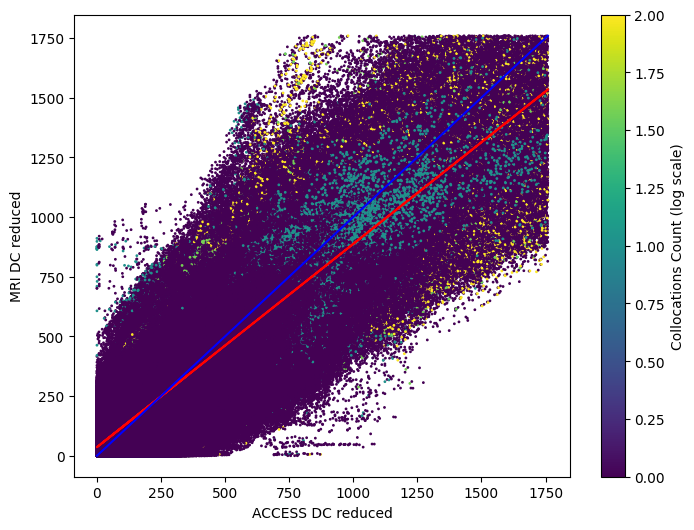

In [4]:
df_fil = df_merged[(df_merged['DC_x'] < 1759) & (df_merged['DC_y'] < 1759)]

x = df_fil['DC_x'].values
y = df_fil['DC_y'].values

# Calculate collocations
xy_collocations = {}
for i in range(len(x)):
    xy = (x[i], y[i])
    if xy in xy_collocations:
        xy_collocations[xy] += 1
    else:
        xy_collocations[xy] = 1

# Extract coordinates and counts
coords = np.array(list(xy_collocations.keys()))
counts = np.array(list(xy_collocations.values()))

# Set up color map using logarithmic scale
norm = plt.Normalize(0, 2) # Log scale min, max
cmap = plt.cm.viridis

# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(coords[:, 0], coords[:, 1], c=np.log2(counts), cmap=cmap, norm=norm, s=1)
plt.colorbar(label='Collocations Count (log scale)')

# Calculate linear regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color='red')

# Plot y=x line
plt.plot(np.linspace(0, 1759, 1759), np.linspace(0, 1759, 1759), color='blue')

plt.xlabel('ACCESS DC reduced')
plt.ylabel('MRI DC reduced')
plt.savefig('ACCESS_vs_MRI_DC_reduced.png', dpi=600, bbox_inches='tight')
plt.show()

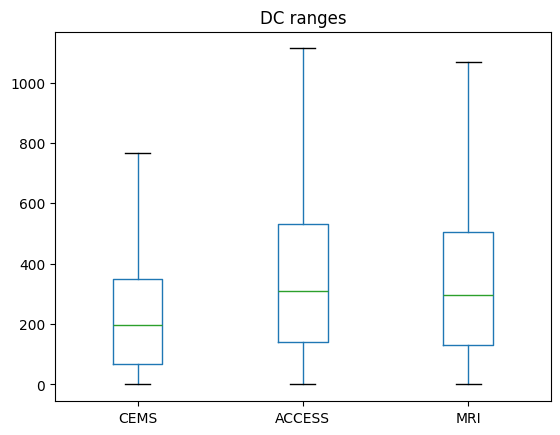

In [6]:
# Boxplot
df_plot = df_merged.copy()
df_plot = df_plot.rename(columns={'DC_x': 'CEMS', 'DC_y': 'ACCESS', 'DC': 'MRI'})
columns_to_plot = ['CEMS', 'ACCESS', 'MRI']

ax = f.add_subplot(111)

#ax = df_plot[columns_to_plot].boxplot()
ax = df_plot[columns_to_plot].boxplot(showfliers=False) # No outliers

# Add labels and title
plt.title('DC ranges')
ax.grid(False)

# Show the plot
#plt.savefig('isi_range_box_nooutliers.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Calculate the Q1 (25th percentile) and Q3 (75th percentile)
df_plot = df_merged.copy()
df_plot = df_plot.rename(columns={'BUI_x': 'CEMS', 'BUI_y': 'ACCESS', 'BUI': 'MRI'})
Q1 = df_plot['CEMS'].quantile(0.25)
Q3 = df_plot['CEMS'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper whisker (maximum value within 1.5*IQR of Q3)
upper_whisker = Q3 + 1.5 * IQR

# Find the largest value that is less than or equal to the upper whisker
upper_whisker_value = df_plot['CEMS'][df_plot['CEMS'] <= upper_whisker].max()

print("Upper whisker value:", upper_whisker_value)

Upper whisker value: 22.081


In [ ]:
# Violin plot
df_plot = df_merged.copy()
df_plot = df_plot.rename(columns={'BUI_x': 'CEMS', 'BUI_y': 'ACCESS', 'BUI': 'MRI'})

# Extra code to hide outliers
#df_plot = df_plot[(df_plot <= upper_whisker_value).all(axis=1)]

columns_to_plot = ['CEMS', 'ACCESS', 'MRI']

df_melted = df_plot[columns_to_plot].reset_index().melt(id_vars=['year', 'month', 'latitude', 'longitude'], 
                                                        value_vars=columns_to_plot, 
                                                        var_name='BUI Component', 
                                                        value_name='Value')

ax = f.add_subplot(111)
ax = sns.violinplot(x='BUI Component', y='Value', data=df_melted, palette='husl', hue='BUI Component')

# Add labels and title
plt.title('BUI ranges')
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.savefig('bui_range_violin.png', dpi=300, bbox_inches='tight')
plt.show()